In [ ]:
import sys
import os

# Add the synthetic_data_generation directory to the Python path
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

# Go up one level from notebooks to synthetic_data_generation
parent_dir = os.path.dirname(current_dir)
print(f"Parent directory: {parent_dir}")

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from diversity.diversity_generator import DiversityGenerator
from models.diversity_generator import LengthDistributionConfig

Testing different configurations:
Config: mean=1.5, sigma=0.3, shift=2
Generated lengths - Min: 3, Max: 13, Mean: 6.2, Std: 1.4


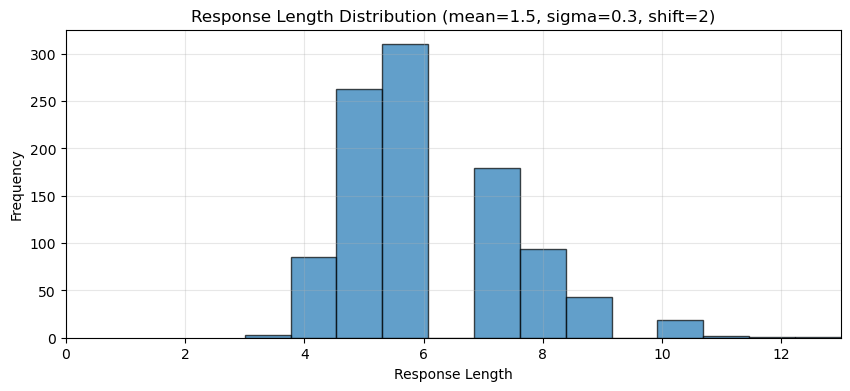

Config: mean=2.0, sigma=0.8, shift=3
Generated lengths - Min: 3, Max: 61, Mean: 12.2, Std: 8.3


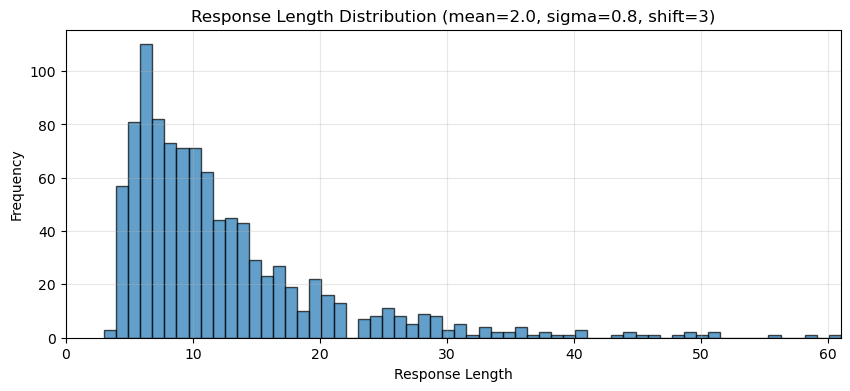

Config: mean=2.5, sigma=0.5, shift=1
Generated lengths - Min: 3, Max: 66, Mean: 14.7, Std: 7.8


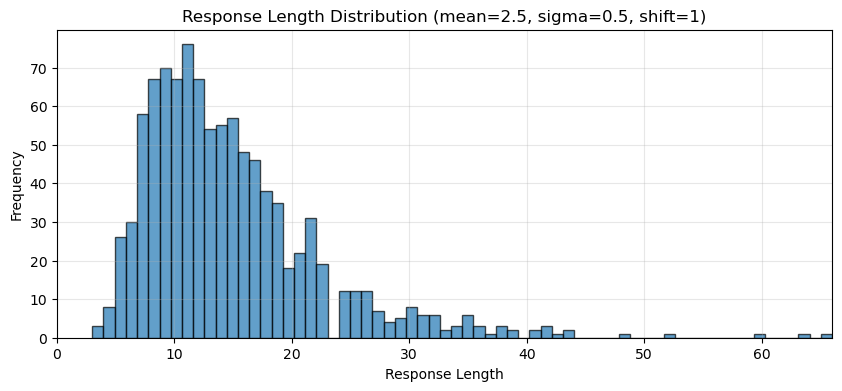

[7,
 12,
 9,
 17,
 20,
 21,
 36,
 11,
 16,
 4,
 15,
 13,
 17,
 6,
 24,
 19,
 13,
 15,
 18,
 22,
 16,
 29,
 13,
 16,
 7,
 5,
 14,
 12,
 7,
 22,
 14,
 17,
 13,
 39,
 6,
 16,
 16,
 10,
 19,
 9,
 15,
 21,
 15,
 26,
 18,
 13,
 11,
 15,
 27,
 11,
 11,
 23,
 9,
 31,
 12,
 23,
 11,
 11,
 16,
 12,
 52,
 30,
 9,
 6,
 7,
 25,
 8,
 11,
 18,
 17,
 12,
 18,
 12,
 19,
 10,
 11,
 7,
 35,
 21,
 10,
 6,
 26,
 10,
 7,
 8,
 8,
 19,
 15,
 15,
 10,
 5,
 15,
 6,
 9,
 13,
 21,
 11,
 15,
 16,
 10,
 9,
 15,
 19,
 7,
 10,
 16,
 3,
 9,
 25,
 21,
 9,
 9,
 18,
 12,
 8,
 5,
 22,
 5,
 14,
 8,
 8,
 5,
 15,
 8,
 11,
 4,
 11,
 22,
 15,
 14,
 6,
 14,
 9,
 15,
 9,
 11,
 19,
 6,
 14,
 10,
 8,
 18,
 8,
 13,
 22,
 21,
 30,
 6,
 7,
 9,
 38,
 9,
 31,
 13,
 8,
 8,
 14,
 21,
 14,
 5,
 4,
 25,
 19,
 17,
 14,
 7,
 8,
 19,
 12,
 11,
 9,
 9,
 16,
 17,
 7,
 18,
 18,
 9,
 15,
 22,
 14,
 11,
 8,
 44,
 13,
 11,
 11,
 11,
 23,
 12,
 17,
 10,
 5,
 14,
 15,
 11,
 32,
 22,
 14,
 37,
 22,
 6,
 19,
 20,
 12,
 7,
 12,
 27,
 8,
 10,
 10,
 36,
 

In [ ]:
# Experiment with different configuration parameters (sanitized)
import matplotlib.pyplot as plt
import numpy as np

def test_config(mean, sigma, shift, num_samples=1000):
    """Test a configuration and show statistics"""
    config = LengthDistributionConfig(mean=mean, sigma=sigma, shift=shift)
    diversity_gen = DiversityGenerator(config)
    
    lengths = [diversity_gen._get_response_length() for _ in range(num_samples)]
    
    print(f"Config: mean={mean}, sigma={sigma}, shift={shift}")
    print(f"Generated lengths - Min: {min(lengths)}, Max: {max(lengths)}, Mean: {np.mean(lengths):.1f}, Std: {np.std(lengths):.1f}")
    
    # Plot histogram
    plt.figure(figsize=(10, 4))
    # Use max length as number of bins and set x-axis to start at 0
    max_length = max(lengths)
    plt.hist(lengths, bins=max_length, alpha=0.7, edgecolor='black')
    plt.title(f'Response Length Distribution (mean={mean}, sigma={sigma}, shift={shift})')
    plt.xlabel('Response Length')
    plt.ylabel('Frequency')
    plt.xlim(0, max_length)  # Set x-axis to start at 0
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return lengths

# Test different configurations
print("Testing different configurations:")
print("="*50)

# Configuration 1: Lower variability
test_config(mean=1.5, sigma=0.3, shift=2)

# Configuration 2: Higher variability  
test_config(mean=2.0, sigma=0.8, shift=3)

# Configuration 3: Longer responses
test_config(mean=2.5, sigma=0.5, shift=1)